In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [78]:
df = pd.read_csv('/content/9. gurgaon_properties_final.csv', on_bad_lines = 'skip')

df2 = pd.read_csv('/content/5. gurgaon_missing_values_removed.csv', on_bad_lines = 'skip')

df3 = pd.read_csv('/content/10. gurgaon_lat_long_coordinates.csv', on_bad_lines = 'skip')

word_cloud_df = pd.read_csv('/content/3. gurgaon_houses_and_flats_combined.csv', on_bad_lines = 'skip')


In [4]:
df

,property_type,sector,built_up_area,agepossession,bedroom,bathroom,study room,servant room,store room,balcony,furnishing_type,luxury_category,floor_category,price_in_cr
0,flat,Manesar,2233,Moderately Old,4,4,0,0,0,3,Semi-furnished,Low,Mid-rise,0.90
1,house,Sector 48,3229,Moderately Old,4,2,1,1,1,1,Un-furnished,Medium,Low-rise,7.35
2,house,Sector 10A,2367,Moderately Old,4,3,0,0,0,2,Semi-furnished,Low,Low-rise,4.25
3,flat,Sector 81,1300,Relatively New,2,2,0,0,0,3,Semi-furnished,Medium,Mid-rise,0.87
4,flat,Sector 88A,1582,New Property,3,3,0,0,0,3+,Semi-furnished,Medium,High-rise,2.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3634,flat,Sector 83,1544,Relatively New,3,3,0,1,0,3+,Semi-furnished,Medium,High-rise,1.75
3635,flat,Sector 112,1498,Relatively New,2,2,0,0,0,2,Semi-furnished,Medium,Mid-rise,0.70
3636,flat,Sector 70A,1416,Moderately Old,2,2,0,0,0,2,Semi-furnished,Medium,Skyscraper,1.60
3637,house,Sector 11,1217,Relatively New,2,2,0,0,0,3,Semi-furnished,Low,Low-rise,2.10


In [80]:
df[df['built_up_area'] == df['built_up_area'].min()]

,property_type,sector,built_up_area,agepossession,bedroom,bathroom,study room,servant room,store room,balcony,furnishing_type,luxury_category,floor_category,price_in_cr
3023,house,Sector 17,145,Moderately Old,2,2,0,0,0,3,Semi-furnished,Low,Low-rise,0.32


,property_type,sector,built_up_area,agepossession,bedroom,bathroom,study room,servant room,store room,balcony,furnishing_type,luxury_category,floor_category,price_in_cr
1094,house,Sector 43,11309,Relatively New,6,4,1,1,0,1,Un-furnished,Average,Low-rise,27.5


# 1.Price vs Property_type

In [5]:
temp = np.round(df.groupby('property_type')['price_in_cr'].mean(),2).reset_index().rename(columns = {'property_type':'Property Type',	'price_in_cr': 'Average Price(In Crores)'})

fig = px.bar(temp, x = 'Property Type', y = 'Average Price(In Crores)', color = 'Property Type', width = 500, text_auto = True, )

fig.update_layout(title='Average Price by Property Type')
fig.show()


In [6]:
fig = px.box(df, y = 'property_type',  x = 'price_in_cr', color = 'property_type')

fig.update_layout(title = 'Price Range by Property Type', xaxis_title = 'Price(In Crores)', yaxis_title = 'Property Type')
fig.show()

In [7]:
import plotly.figure_factory as ff

x_flats =  df[df['property_type'] == 'flat']['price_in_cr'].values
x_houses = df[df['property_type'] == 'house']['price_in_cr'].values

group_labels = ['flat', 'house']

hist_data = [x_flats, x_houses]

fig = ff.create_distplot(hist_data, group_labels, colors = ['lightgreen', 'magenta'])

fig.update_layout(
    title = 'Distribution of Property Prices by Property Type',
    xaxis_title = 'Price in Crores (Cr)',
    yaxis_title = 'Density'
)
fig.show()

# 2.Price vs Sector

In [8]:
temp = df.groupby('sector')['price_in_cr'].mean().round(2).reset_index().rename(columns = {'sector':'Sector','price_in_cr':'Average Price(In Crores)'})

fig = px.treemap(temp,  path = [px.Constant('Gurgaon'), 'Sector'], values = 'Average Price(In Crores)', color = 'Average Price(In Crores)',
                        hover_name = 'Sector', color_continuous_scale = 'jet')

fig.update_layout(title='Gurgaon Properties Average Price by Sector', height = 700, width = 1500)
fig.show()


In [9]:
temp = df[(df['property_type'] == 'flat')].groupby('sector')['price_in_cr'].mean().round(2).reset_index().rename(columns = {'sector':'Sector','price_in_cr':'Average Price(In Crores)'})

fig = px.treemap(temp, path = [px.Constant('Gurgaon'), 'Sector'], values = 'Average Price(In Crores)', color = 'Average Price(In Crores)',  hover_name = 'Sector', color_continuous_scale = 'viridis')

fig.update_layout(title='Gurgaon Flats Average Price by Sector', height = 700, width = 1500)
fig.show()


In [10]:
temp = df[(df['property_type'] == 'house')].groupby('sector')['price_in_cr'].mean().round(2).reset_index().rename(columns = {'sector':'Sector', 'price_in_cr':'Average Price(In Crores)'})

fig = px.treemap(temp, path = [px.Constant('Gurgaon'), 'Sector'], values = 'Average Price(In Crores)', color = 'Average Price(In Crores)', hover_name = 'Sector', color_continuous_scale = 'Viridis')

fig.update_layout(title='Gurgaon Houses Average Price by Sector', height = 700, width = 1500)
fig.show()


# 3.Price vs Built Up Area

In [62]:
temp = df[df['property_type'] == 'flat']

fig = px.scatter(temp, x = 'built_up_area', y = 'price_in_cr', color = 'bedroom')
fig.update_layout(title = 'Price vs Built Up Area of flat', yaxis_title = 'Price (In Crores)', xaxis_title = 'Built Up Area')
fig.show()

In [63]:
temp = df[df['property_type'] == 'house']

fig = px.scatter(temp, x = 'built_up_area', y = 'price_in_cr', title = 'Price vs Built Up Area of house', color = 'bedroom')
fig.update_layout(title = 'Price vs Built Up Area of house', yaxis_title = 'Price (In Crores)', xaxis_title = 'Built Up Area')
fig.show()

# 4.Price vs Bedroom

In [13]:
temp = df.groupby('bedroom')['price_in_cr'].mean().reset_index().round(2)
temp['bedroom'] = temp['bedroom'].astype(str)

fig = px.bar(temp, x = 'bedroom', y = 'price_in_cr', color = 'bedroom', width = 700, text_auto = True)
fig.update_layout(title = 'Average Price by Bedroom', xaxis_title = 'Bedroom', yaxis_title = 'Average Price(In Crores)')
fig.show()

In [54]:
fig = px.box(df, x = 'bedroom',  y = 'price_in_cr', color = 'bedroom', points = 'all')
fig.update_layout(title = 'Price Range by Bedroom', xaxis_title = 'Bedroom', yaxis_title = 'Price(In Crores)')
fig.show()


# 5.Price vs Bathroom

In [15]:
temp = df.groupby('bathroom')['price_in_cr'].mean().reset_index().round(2)
temp['bathroom'] = temp['bathroom'].astype(str)

fig = px.bar(temp, x = 'bathroom', y = 'price_in_cr', color = 'bathroom', width = 700, text_auto = True)
fig.update_layout(title = 'Average Price by Bathroom', xaxis_title = 'Bathroom', yaxis_title = 'Average Price(In Crores)')
fig.show()


In [52]:
temp = df[df['bathroom'] < 5]

fig = px.box(temp, x = 'bathroom',  y = 'price_in_cr', color = 'bathroom', points = 'all' ,width = 800)
fig.update_layout(title = 'Price Range by Bathroom', xaxis_title = 'Bathroom',  yaxis_title = 'Price(In Crores)')
fig.show()

# 6.Price vs Study Room

In [17]:
temp = df.groupby('study room')['price_in_cr'].mean().reset_index().round(2)
temp['study room'] = temp['study room'].astype(str)

fig = px.bar(temp, x = 'study room', y = 'price_in_cr', color = 'study room', width = 500, text_auto = True)
fig.update_layout(title='Average Price by Study room', xaxis_title = 'Study Room', yaxis_title = 'Average Price(In Crores)')
fig.show()

# 7.Price vs Servant Room

In [18]:
temp = df.groupby('servant room')['price_in_cr'].mean().round(2).reset_index()
temp['servant room'] = temp['servant room'].astype(str)

fig = px.bar(temp, x = 'servant room', y = 'price_in_cr', color = 'servant room', width = 500, text_auto = True)
fig.update_layout(title='Average Price by Servant Room', xaxis_title = 'Servant Room', yaxis_title = 'Average Price(In Crores)')
fig.show()

# 8.Price vs Store Room

In [19]:
temp = df.groupby('store room')['price_in_cr'].mean().reset_index().round(2)
temp['store room'] = temp['store room'].astype(str)

fig = px.bar(temp, x = 'store room', y = 'price_in_cr', color = 'store room',  width = 500,text_auto = True)
fig.update_layout(title='Average Price by Store Room', xaxis_title = 'Store Room', yaxis_title = 'Average Price(In Crores)')
fig.show()


# 9.Price vs Luxury Category

In [70]:
temp = df.groupby('luxury_category')['price_in_cr'].mean().sort_values(ascending = True).reset_index().round(2).rename(columns = {'luxury_category': 'Luxury Category','price_in_cr': 'Average Price(In Crores)'})

fig = px.bar(temp, x = 'Luxury Category', y = 'Average Price(In Crores)', color = 'Luxury Category', width = 700, text_auto = True )
fig.update_layout(title ='Average Price by Luxury Type')
fig.show()


In [50]:
fig = px.box(df, y = 'luxury_category',  x = 'price_in_cr', color = 'luxury_category')

fig.update_layout(title = 'Price Range by Luxury Type', yaxis_title = 'Luxury Category', xaxis_title = 'Price(In Crores)' )
fig.show()

# 10.Price vs Floor Category

In [22]:
temp = df.groupby('floor_category')['price_in_cr'].mean().sort_values(ascending = True).reset_index().round(2).rename(columns = {'floor_category': 'Floor Category','price_in_cr': 'Average Price (Crores)'})

fig = px.bar(temp, x = 'Floor Category', y = 'Average Price (Crores)', width = 900, height = 600, color = 'Floor Category', text_auto = True)
fig.update_layout(title='Average Price by Floor Type')
fig.show()


# 11.Price vs Age Possession

In [23]:
temp = df.groupby('agepossession').agg({'built_up_area':'mean','price_in_cr':'mean'}).round(2).sort_values(by = 'price_in_cr', ascending = True).reset_index()
temp.rename(columns = {'agepossession': 'Age Possession', 'built_up_area' : 'Built-Up Area', 'price_in_cr': 'Average Price (In Crores)'}, inplace = True)
temp['Built-Up Area'] = temp['Built-Up Area'].astype(int)

fig = px.bar(temp, x = 'Age Possession', y = 'Average Price (In Crores)', width = 800, color = 'Built-Up Area', hover_name = 'Built-Up Area', text_auto = True)
fig.update_layout(title = 'Average Price (In Crores) vs Age Possession with Built Up Area')
fig.show()


# 12.property_type vs bedroom

In [24]:
crosstab = pd.crosstab(df['property_type'], df['bedroom'])

fig = px.imshow(crosstab, width = 800, height = 450, text_auto = True)

fig.update_layout(title = 'Property Type vs Number of Bedrooms Distribution', yaxis_title = 'Property Type')
fig.show()

# 13.property_type vs furnishing_type

In [25]:
crosstab = pd.crosstab(df['property_type'], df['furnishing_type'])

fig = px.imshow(crosstab, text_auto = True, width = 600, height = 400, color_continuous_scale = 'viridis')

fig.update_layout(title='Property Type vs. Furnishing Type Distribution', xaxis_title = 'Furnishing Type', yaxis_title = 'Property Type')

fig.show()


# 14.property_type vs floor_category

In [26]:
crosstab = pd.crosstab(df['property_type'], df['floor_category'])

fig = px.imshow(crosstab , text_auto = True, width = 800, height = 450, color_continuous_scale = 'viridis')

fig.update_layout(title='Property Type vs. Floor Type Distribution', xaxis_title = 'Floor Type', yaxis_title = 'Property Type')

fig.show()


# 15.property_type vs agepossession

In [27]:
crosstab = pd.crosstab(df['property_type'], df['agepossession'])

fig = px.imshow(crosstab, text_auto = True, width = 800, height = 450, color_continuous_scale = 'viridis')

fig.update_layout(title='Property Type vs. Age Possession Distribution', xaxis_title = 'Age Possession', yaxis_title = 'Property Type')

fig.show()

# 16.property_type vs luxury_category

In [28]:
crosstab = pd.crosstab(df['property_type'], df['luxury_category'])

fig = px.imshow(crosstab, text_auto = True, width = 800, height = 450, color_continuous_scale = 'viridis')

fig.update_layout(title='Property Type vs. Luxury Category Distribution', xaxis_title = 'Luxury Category', yaxis_title = 'Property Type')

fig.show()

In [29]:
df.head()

,property_type,sector,built_up_area,agepossession,bedroom,bathroom,study room,servant room,store room,balcony,furnishing_type,luxury_category,floor_category,price_in_cr
0,flat,Manesar,2233,Moderately Old,4,4,0,0,0,3,Semi-furnished,Low,Mid-rise,0.90
1,house,Sector 48,3229,Moderately Old,4,2,1,1,1,1,Un-furnished,Medium,Low-rise,7.35
2,house,Sector 10A,2367,Moderately Old,4,3,0,0,0,2,Semi-furnished,Low,Low-rise,4.25
3,flat,Sector 81,1300,Relatively New,2,2,0,0,0,3,Semi-furnished,Medium,Mid-rise,0.87
4,flat,Sector 88A,1582,New Property,3,3,0,0,0,3+,Semi-furnished,Medium,High-rise,2.65


# 17.property_type vs built_up_area

In [30]:
fig = px.box(df, x = 'built_up_area', color = 'property_type')
fig.update_layout(title = 'Distribution of Built-Up Area by Property Type', xaxis_title = 'Built-Up Area (in Sqft)')
fig.show()

# 18.Price vs Society

In [31]:
temp = pd.pivot_table(df2, index = 'society', values = 'price_in_cr', aggfunc = 'median').reset_index()
temp = temp.sort_values(by = 'price_in_cr',ascending = False).round(2).head(25)

fig = px.bar(temp, x= 'society', y = 'price_in_cr', color = 'society', text_auto = True)
fig.update_layout(title = 'Top 25 Expensive Socities with Average Price(In Crore)', yaxis_title = 'Average Price(In Crores)')
fig.show()

In [32]:
temp = pd.pivot_table(df2, index = 'society', values = 'price_in_cr', aggfunc = 'median').reset_index()
temp = temp.sort_values(by = 'price_in_cr',ascending = True).round(2).head(25)

fig = px.bar(temp, x= 'society', y = 'price_in_cr', color = 'society', text_auto = True)
fig.update_layout(title = 'Top 25 Budget Friendly Socities with Average Price(In Crore)', yaxis_title = 'Average Price(In Crores)')
fig.show()

# 19.Bedroom Distribution Across Sectors

In [33]:
temp = df['bedroom'].value_counts().reset_index()

fig = px.pie(temp, values = 'count', names = 'bedroom', hover_name = 'bedroom', hole = 0.4)

fig.update_traces(textinfo = 'label+percent')
fig.update_layout(title = 'Bedroom Distribution Across Sectors')

fig.show()

# 20.Geo Map

In [34]:
df3.head()

,sector,coordinates,latitude,longitude
0,Sector 1,"28.3663° N, 76.9456° E",28.3663,76.9456
1,Sector 2,"28.5095° N, 77.0320° E",28.5095,77.0320
2,Sector 3,"28.4909° N, 77.0176° E",28.4909,77.0176
3,Sector 4,"28.4738° N, 77.0107° E",28.4738,77.0107
4,Sector 5,"28.4794° N, 77.0176° E",28.4794,77.0176


In [35]:
df3.drop(columns = 'coordinates', inplace = True)

df3.head()

,sector,latitude,longitude
0,Sector 1,28.3663,76.9456
1,Sector 2,28.5095,77.0320
2,Sector 3,28.4909,77.0176
3,Sector 4,28.4738,77.0107
4,Sector 5,28.4794,77.0176


In [36]:
df2.head()

,property_type,society,sector,price_in_cr,price_per_sqft,bedroom,bathroom,balcony,facing,agepossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,Shree Vardhman Victoria,Sector 70,1.78,9128,3,3,3+,north-east,Relatively New,1765,0,1,0,0,1,Semi-furnished,Average,Mid-rise
1,flat,Mapsko Mount Ville,Sector 79,1.30,8724,3,3,3,east,Relatively New,1176,0,0,1,0,0,Un-furnished,Medium,High-rise
2,house,Bhim Nagar Society,Sector 6,0.40,2500,4,2,3,east,Old,1600,0,0,0,0,0,Semi-furnished,Low,Low-rise
3,house,Madan Puri,Sector 7,0.75,12500,3,2,1,south-east,Moderately Old,600,0,0,0,0,0,Semi-furnished,Low,Low-rise
4,flat,DLF The Icon,Sector 43,5.25,20388,4,4,3,north,Old,2570,0,1,0,1,1,Semi-furnished,Medium,Mid-rise


In [37]:
merge_df = df2.merge(df3, how = 'inner', on = 'sector')

merge_df.head()

,property_type,society,sector,price_in_cr,price_per_sqft,bedroom,bathroom,balcony,facing,agepossession,...,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category,latitude,longitude
0,flat,Shree Vardhman Victoria,Sector 70,1.78,9128,3,3,3+,north-east,Relatively New,...,0,1,0,0,1,Semi-furnished,Average,Mid-rise,28.3968,77.0233
1,flat,Mapsko Mount Ville,Sector 79,1.30,8724,3,3,3,east,Relatively New,...,0,0,1,0,0,Un-furnished,Medium,High-rise,28.3624,76.9787
2,house,Bhim Nagar Society,Sector 6,0.40,2500,4,2,3,east,Old,...,0,0,0,0,0,Semi-furnished,Low,Low-rise,28.4745,77.0262
3,house,Madan Puri,Sector 7,0.75,12500,3,2,1,south-east,Moderately Old,...,0,0,0,0,0,Semi-furnished,Low,Low-rise,28.4644,77.0143
4,flat,DLF The Icon,Sector 43,5.25,20388,4,4,3,north,Old,...,0,1,0,1,1,Semi-furnished,Medium,Mid-rise,28.4629,77.0772


In [38]:
# merge_df.to_csv('gurgaon_missing_values_removed_with_corrdinates.csv', index = False)

In [39]:
group_df = merge_df.groupby('sector').mean(numeric_only= True)[['price_in_cr',	'price_per_sqft', 'built_up_area', 'latitude', 'longitude']]

group_df.rename(columns = {'price_in_cr':'Average Price(In Crores)', 'price_per_sqft':'Average Price/Sqft', 'built_up_area':'Average Built-Up Area', 'latitude':'Latitude', 'longitude':'Longitude' }, inplace = True)

group_df['Average Price(In Crores)'] = group_df['Average Price(In Crores)'].round(2)

group_df = group_df.astype({'Average Price/Sqft':int, 'Average Built-Up Area':int}).reset_index().rename(columns = {'sector':'Sector'})

group_df.head()



,Sector,Average Price(In Crores),Average Price/Sqft,Average Built-Up Area,Latitude,Longitude
0,Gwal Pahari,3.35,9793,3175,28.4484,77.0210
1,Manesar,0.96,4607,2021,28.3515,76.9428
2,Sector 1,1.86,8249,2324,28.3663,76.9456
3,Sector 102,1.70,10603,1552,28.4750,76.9715
4,Sector 103,1.49,7404,1868,28.4949,76.9845


In [58]:
fig = px.scatter_mapbox(group_df, lat = 'Latitude', lon = 'Longitude', color = 'Average Price/Sqft', size = 'Average Built-Up Area',
                        size_max=20, zoom=11, height=700, width=1200, color_continuous_scale='jet',mapbox_style='open-street-map',
                        hover_name='Sector',
                        hover_data={
                        'Average Price(In Crores)': True,
                        'Average Price/Sqft': True,
                        'Average Built-Up Area': True})

fig.update_layout(title="Gurgaon Real Estate Price/Sqft by Sector", title_x=0.5)
fig.show()

# Remaining

# 21.Word Cloud

In [71]:
word_cloud_df.head()

,property_type,society,sector,price_in_cr,price_per_sqft,area_in_sqft,areawithtype,bedroom,bathroom,balcony,additionalroom,floornum,facing,agepossession,nearbylocations,furnishdetails,features,area_in_sq_ft
0,flat,Maa Bhagwati Residency,Sector 7,0.45,5000.0,900.0,Carpet area: 900 (83.61 sq.m.),2,2,1,not available,4,west,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pear...","['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...",NaN
1,flat,Apna Enclave,Sector 3,0.50,7692.0,650.0,Carpet area: 650 (60.39 sq.m.),2,2,1,not available,1,west,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Maintenance Staff',...",NaN
2,flat,Tulsiani Easy In Homes,Sohna Road,0.40,6722.0,595.0,Carpet area: 595 (55.28 sq.m.),2,2,3,not available,12,na,0 to 1 Year Old,"['Huda City Metro', 'Golf Course extn road', '...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...",NaN
3,flat,Smart World Orchard,Sector 61,1.47,12250.0,1200.0,Carpet area: 1200 (111.48 sq.m.),2,2,2,study room,2,na,Dec 2023,"['Sector 55-56 Metro station', 'Bestech Centra...",NaN,"['Security / Fire Alarm', 'Private Garden / Te...",NaN
4,flat,Parkwood Westend,Sector 92,0.70,5204.0,1345.0,Super Built up area 1345(124.95 sq.m.),2,2,3,study room,5,na,Under Construction,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...",[],NaN,NaN


In [72]:
word_cloud_df['features'].loc[0]

"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Lift(s)', 'Water Storage', 'Visitor Parking']"

In [73]:
import ast
from wordcloud import WordCloud, STOPWORDS

In [74]:
data = word_cloud_df[word_cloud_df['sector'] == 'Sector 67']['features'].dropna().values

data[:4]

array(["['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",
       "['Centrally Air Conditioned', 'Water purifier', 'High Ceiling Height', 'Separate entry for servant room', 'No open drainage around', 'Recently Renovated', 'Piped-gas', 'Swimming Pool', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",
       "['Centrally Air Conditioned', 'Water purifier', 'High Ceiling Height', 'Separate entry for servant room', 'No open drainage around', 'Recently Renovated', 'Piped-gas', 'Swimming Pool', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club

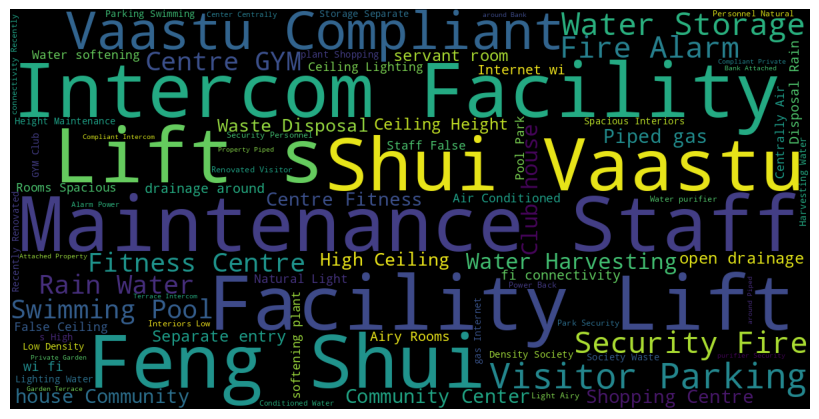

In [75]:
unique_list = list(item for sublist in data for item in ast.literal_eval(sublist))

feature_text = ' '.join(unique_list)

stopwords = set(STOPWORDS)

wordcloud = WordCloud(width = 1200, height = 600, background_color = 'black', stopwords = stopwords, min_font_size = 10).generate(feature_text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


In [49]:
# sector_list = sorted(df2['sector'].unique().tolist(), key = len)
# sector_list.insert(0,'Overall')